In [17]:
import numpy as np
import os
import pandas as pd
import pydicom
from pydicom.dataset import FileDataset
from pathlib import Path
from typing import Generator
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
image_sizes = [128, 128, 128]

data_dir = "/Volumes/Data/kaggle/raw"

In [3]:
df_train: pd.DataFrame = pd.read_csv(os.path.join(data_dir, 'train.csv'))
mask_files: list = os.listdir(f'{data_dir}/segmentations')
df_mask: pd.DataFrame = pd.DataFrame({
    'mask_file': mask_files,
})
df_mask['StudyInstanceUID'] = df_mask['mask_file'].apply(
  lambda x: x[:-4]
)
df_mask['mask_file'] = df_mask['mask_file'].apply(
  lambda x: os.path.join(data_dir, 'segmentations', x)
)
df = df_train.merge(df_mask, on='StudyInstanceUID', how='left')
df['image_folder'] = df['StudyInstanceUID'].apply(
  lambda x: os.path.join(data_dir, 'train_images', x)
)
df_seg = df[df["mask_file"].notna()].reset_index(drop=True)

kf: KFold = KFold(5)
df_seg['fold'] = -1
for fold, (train_idx, validation_idx) in enumerate(kf.split(df_seg, df_seg)):
  df_seg.loc[validation_idx, 'fold'] = fold

display(df_train)
display(df_mask)
display(df)
display(df_seg)

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0


,mask_file,StudyInstanceUID
0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.2243
1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.3376
2,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18906
3,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18480
4,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.30640
...,...,...
82,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.24606
83,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.8574
84,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.27292
85,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.6376


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....
...,...,...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder,fold
0,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
1,1.2.826.0.1.3680043.25704,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
2,1.2.826.0.1.3680043.20647,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
3,1.2.826.0.1.3680043.31077,1,0,0,1,1,1,1,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
4,1.2.826.0.1.3680043.17960,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.32071,1,0,1,0,1,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
83,1.2.826.0.1.3680043.30524,1,0,0,0,0,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
84,1.2.826.0.1.3680043.28025,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
85,1.2.826.0.1.3680043.21321,1,1,1,1,0,0,0,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4


In [4]:
image_folder: Path = Path(df_seg.loc[0, "image_folder"])
images: Generator = image_folder.glob("*")
image_path: str = next(images)
image_path

PosixPath('/Volumes/Data/kaggle/raw/train_images/1.2.826.0.1.3680043.1363/16.dcm')

In [5]:
dicom = pydicom.read_file(image_path)
dicom

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.1363.1.16
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.1363.1.16
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '183922.928430'
(0010, 0010) Patient's Name                      PN: '1363'
(0010, 0020) Patient ID                          LO: '1363'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1.368

In [6]:
type(dicom)

pydicom.dataset.FileDataset

(-0.5, 511.5, 511.5, -0.5)

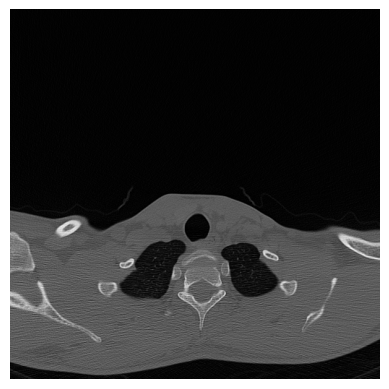

In [7]:
import matplotlib.pyplot as plt

plt.imshow(dicom.pixel_array, cmap="gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

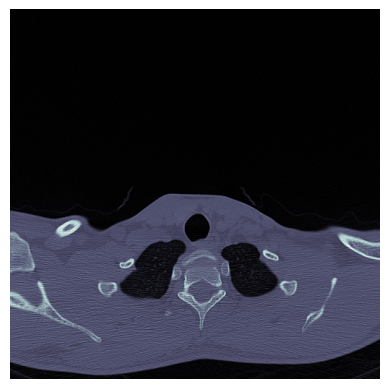

In [8]:
plt.imshow(dicom.pixel_array, cmap=plt.cm.bone)
plt.axis('off')

In [9]:
def load_dicoms(path: str) -> list[FileDataset]:
  dicom_file_names: list[str] = os.listdir(path=path)
  
  dicom_files: list[FileDataset] = []
  
  for dicom_file_name in dicom_file_names:
    dicom_files.append(
      pydicom.read_file(os.path.join(path, dicom_file_name))
    )
  
  
  return sorted(
    dicom_files,
    key= lambda x: x.InstanceNumber
  )

In [10]:
study: str = "1.2.826.0.1.3680043.10051"
study_row: pd.DataFrame = df[df["StudyInstanceUID"] == study].reset_index(drop=True)
data = load_dicoms(path = study_row.loc[0, "image_folder"])
data

[Dataset.file_meta -------------------------------
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10051.1.1
 (0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
 -------------------------------------------------
 (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10051.1.1
 (0008, 0023) Content Date                        DA: '20220727'
 (0008, 0033) Content Time                        TM: '183713.701337'
 (0010, 0010) Patient's Name                      PN: '10051'
 (0010, 0020) Patient ID                          LO: '10051'
 (0018, 0050) Slice Thickness                     DS: '0.625'
 (0020, 000d) Study Instance UID                  

In [11]:
for d in data:
  print(d.InstanceNumber)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


In [12]:
slice_number: int = 133
slice_dicom: FileDataset =  data[slice_number-1]
slice_dicom

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10051.1.133
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10051.1.133
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '183726.723137'
(0010, 0010) Patient's Name                      PN: '10051'
(0010, 0020) Patient ID                          LO: '10051'
(0018, 0050) Slice Thickness                     DS: '0.625'
(0020, 000d) Study Instance UID                  UI: 1.2.826

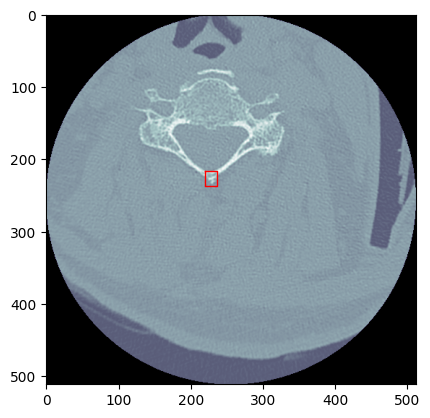

In [13]:
x_min = 219.27715
y_min = 216.71419
w = 17.30439999999
h = 20.385169999

plt.imshow(slice_dicom.pixel_array, cmap=plt.cm.bone)
plt.plot(
  [x_min, x_min+w, x_min+w, x_min, x_min],
  [y_min, y_min, y_min+h, y_min+h, y_min],
  color="red",
  linewidth=1
)

In [14]:
def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

In [15]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces, normals, values = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [18]:
dicom_3d = get_pixels_hu(data)
dicom_3d.shape

(272, 512, 512)

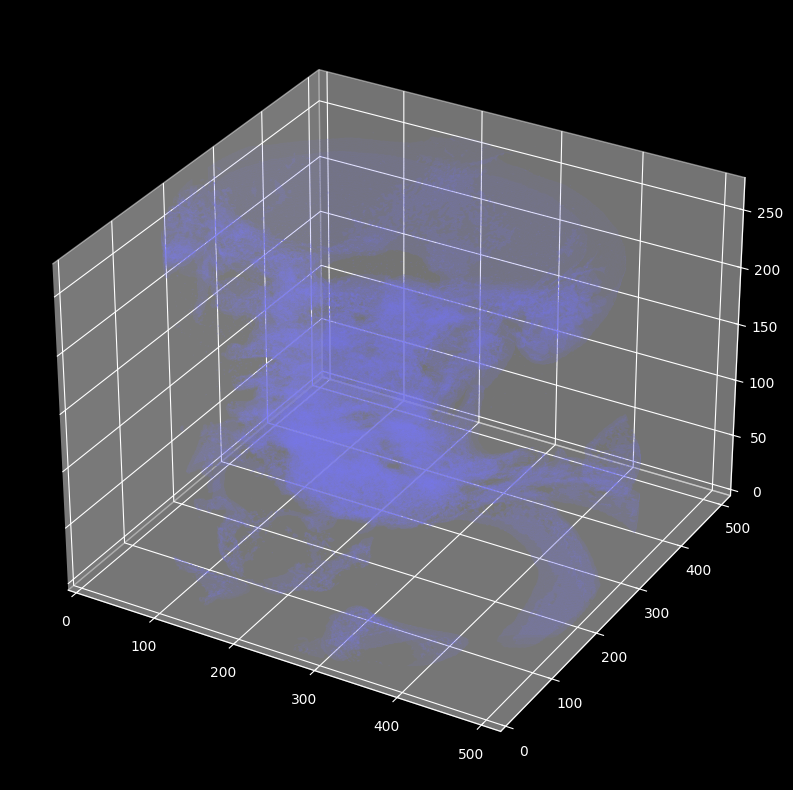

In [120]:
plot_3d(dicom_3d, 400)

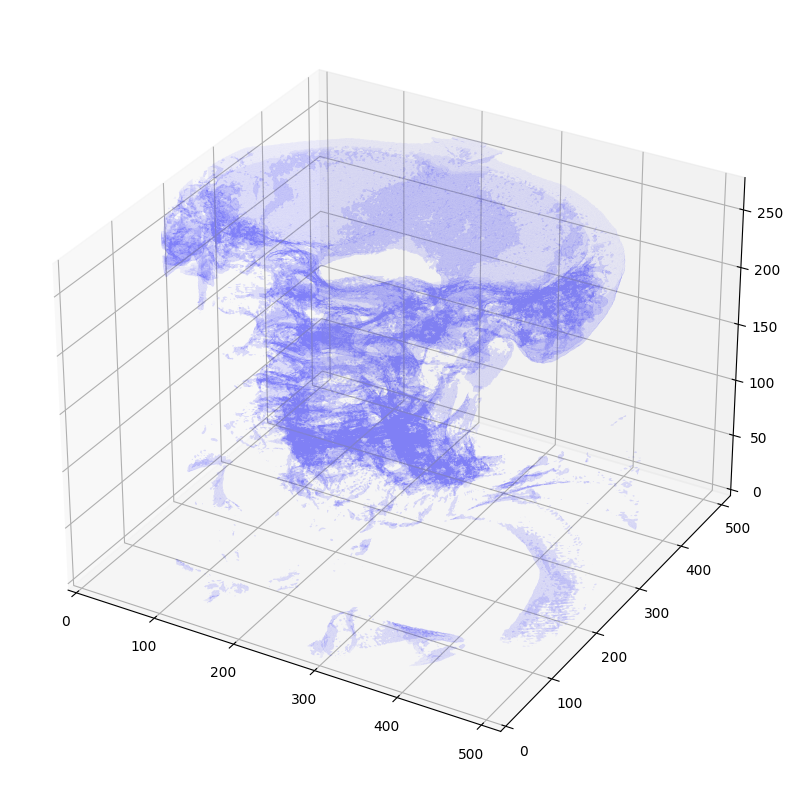

In [19]:
plot_3d(dicom_3d, 1000)

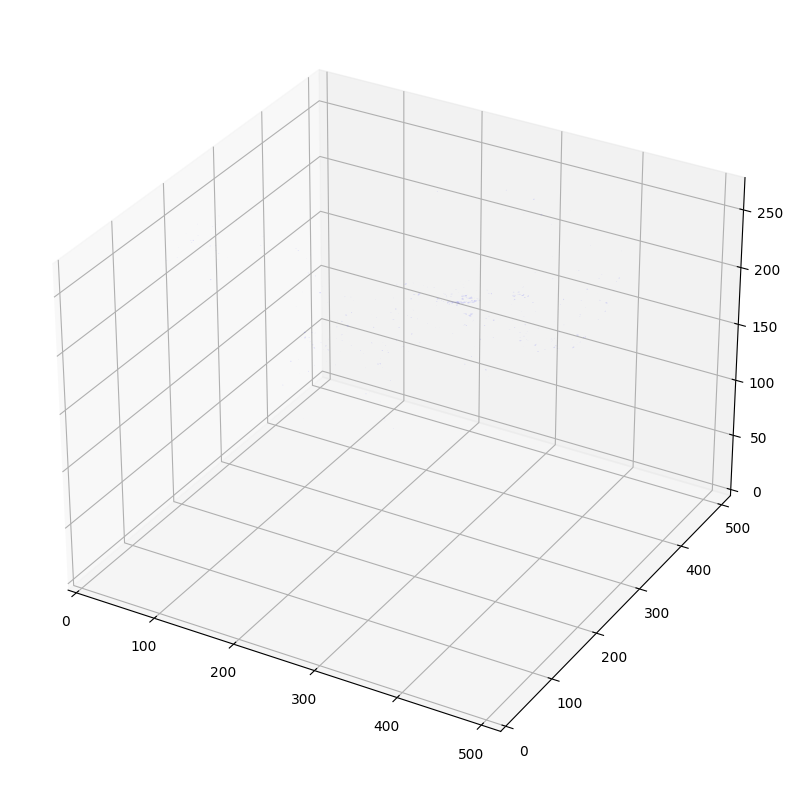

In [20]:
plot_3d(dicom_3d, 2000)

In [122]:
import numpy as np
dicom_3d: list = []

for d in data:
  dicom_3d.append(d.pixel_array)
  
dicom_3d = np.array(dicom_3d)

In [123]:
plot_3d(dicom_3d, 1000)

(272, 512, 512)

In [118]:
plot_3d(dicom_3d)

ValueError: too many values to unpack (expected 2)